<a href="https://colab.research.google.com/github/Fasiloc/Deep_learning_learn-repo/blob/main/Mini%20Project/Mini_project_Credit_card_Fraud_Detection_Fasil_oc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from tensorflow import keras

creditcard.csv dataset is taken from kaggle. It is shortened further limited to 99999 columns due to network limitations

In [ ]:
# Dataset loading
credit = pd.read_csv('/content/drive/MyDrive/Deep Learning Miniproject/creditcard.csv')

In [ ]:
credit.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
credit.shape

(284617, 31)

In [ ]:
# checking for null values
credit.isnull().sum()

Time      184619
V1        184619
V2        184619
V3        184619
V4        184619
V5        184619
V6        184619
V7        184619
V8        184619
V9        184619
V10       184619
V11       184619
V12       184619
V13       184619
V14       184619
V15       184619
V16       184619
V17       184619
V18       184619
V19       184619
V20       184619
V21       184619
V22       184619
V23       184619
V24       184619
V25       184619
V26       184619
V27       184619
V28       184619
Amount    184619
Class     184619
dtype: int64

In [ ]:
# removing null values
credit = credit.dropna()

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99997
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99998 non-null  float64
 1   V1      99998 non-null  float64
 2   V2      99998 non-null  float64
 3   V3      99998 non-null  float64
 4   V4      99998 non-null  float64
 5   V5      99998 non-null  float64
 6   V6      99998 non-null  float64
 7   V7      99998 non-null  float64
 8   V8      99998 non-null  float64
 9   V9      99998 non-null  float64
 10  V10     99998 non-null  float64
 11  V11     99998 non-null  float64
 12  V12     99998 non-null  float64
 13  V13     99998 non-null  float64
 14  V14     99998 non-null  float64
 15  V15     99998 non-null  float64
 16  V16     99998 non-null  float64
 17  V17     99998 non-null  float64
 18  V18     99998 non-null  float64
 19  V19     99998 non-null  float64
 20  V20     99998 non-null  float64
 21  V21     99998 non-null  float64
 22

In [ ]:
# Assigning dependent and indipendent variables
x = credit.iloc[:, :-1]
y = credit.iloc[:,-1]

In [ ]:
print(x.shape)
print(y.shape)

(99998, 30)
(99998,)


In [ ]:
from sklearn.model_selection import train_test_split

#Train test split
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size=0.3,random_state=42)

# validation split
train_data, validation_data, train_label, validation_label = train_test_split(train_data, train_label, test_size=.2)

In [ ]:
# converting into normal distribution - Standardisation

mean = np.mean(train_data)
std = np.std(train_data)

train_data -= mean
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

In [ ]:
# creating model
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(50, input_shape=(train_data.shape[1],), activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# compiling model
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics = ['acc'])

In [ ]:
# taking label numbers in trainig data
train_label.value_counts()

0.0    55869
1.0      129
Name: Class, dtype: int64

Here, label 1 are very low compared to label 0, around 466 times low. For balancing this we can introduce weights in neurual network

In [ ]:
weights = {
    0:1,
    1:466
}

In [ ]:
history = model.fit(train_data, train_label, epochs=30, validation_data=(validation_data, validation_label), class_weight=weights)

Epoch 1/30
1750/1750 [==============================] - 5s 2ms/step - loss: 1.8644 - acc: 0.9986 - val_loss: 0.0085 - val_acc: 0.9994
Epoch 2/30
1750/1750 [==============================] - 4s 2ms/step - loss: 1.3593 - acc: 0.9991 - val_loss: 0.0055 - val_acc: 0.9995
Epoch 3/30
1750/1750 [==============================] - 4s 2ms/step - loss: 1.5645 - acc: 0.9992 - val_loss: 0.0057 - val_acc: 0.9995
Epoch 4/30
1750/1750 [==============================] - 4s 3ms/step - loss: 1.1781 - acc: 0.9991 - val_loss: 0.0055 - val_acc: 0.9994
Epoch 5/30
1750/1750 [==============================] - 4s 2ms/step - loss: 1.3616 - acc: 0.9992 - val_loss: 0.0120 - val_acc: 0.9994
Epoch 6/30
1750/1750 [==============================] - 4s 2ms/step - loss: 1.1894 - acc: 0.9991 - val_loss: 0.0042 - val_acc: 0.9995
Epoch 7/30
1750/1750 [==============================] - 4s 2ms/step - loss: 1.3359 - acc: 0.9992 - val_loss: 0.0055 - val_acc: 0.9994
Epoch 8/30
1750/1750 [==============================] - 4s 2ms

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

predictions = model.predict(test_data)
roc_auc_score(test_label, predictions)

0.9581979344456796

In [ ]:
predictions = np.around(predictions)

In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29934
         1.0       0.94      0.70      0.80        66

    accuracy                           1.00     30000
   macro avg       0.97      0.85      0.90     30000
weighted avg       1.00      1.00      1.00     30000



Confusion Matrix :
 [[29931     3]
 [   20    46]]


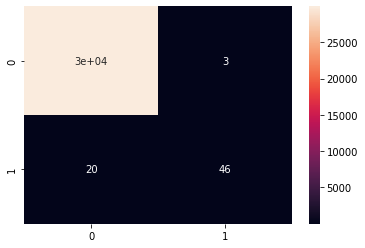

In [ ]:
import seaborn as sns

cm = confusion_matrix(test_label,predictions)
print('Confusion Matrix :\n',cm)
sns.heatmap(cm, annot=True)